

# IF5175 – Analisis Data dan Bisnis Tugas tahap 1

Nama: Harits Abdurrohman

NIM: 23520047

-----

Soal: 

Jelaskan

1.	Apa itu Bland Altman Plot
2.	Apa fungsi dari grafik tersebut
3.	Bagaimana cara melakukan plotting berikut dengan contohnya
4.  Bagaimana cara menginterpretasikannya dan apa hubungannya dengan error

Jawab:

1.	Bland Altman merupakan plot untuk memetakan dua hasil pengukuran kuantatif dari metode yang berbeda. Sumbu X pada plot tersebut menunjukan nilai rata-rata dari pasangan nilai kedua metode, sedangkan untuk sumbu Y merupakan nilai selisih dari pasangan nilai kedua nilai
2. Bland Altman membantu untuk melihat dan menganalisa kesamaan atau perbedaan dari kedua metode yang dilihat berdasarkan nilai rata-rata dan deviasi standarnya. Plot ini baik digunakan untuk task seperti melihat seperti apa perilaku metode yang baru terhadap metode yang lama. Plot ini tidak cocok digunakan untuk menentukan mana metode yang bagus, karena sejatinya plot ini tidak membandingkan kedua nilai, hanya melihat perbedaannya saja dan mengabaikan mana metode yang lebih baik.
3. Untuk melakukan plotting, pertama yang perlu dilakukan adalah menghitung nilai rata-rata nilai dari kedua metode dan selisihnya. Kemudian melakukan pemetaan terhadap bidang kartesian dengan koordinat sebagai berikut. $(\frac{data_1 + data_2}{2}, (data_1, data_2))$. Berikut adalah contoh menggunakan library pyCompare


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyCompare as PC
import random
%matplotlib inline

In [2]:
random.seed(10)
np.random.seed(1)

In [23]:
metode_1 = np.random.rand(20)
metode_2 = [random.random() for _ in range(20)]


In [24]:
metode_1

array([0.90340192, 0.1374747 , 0.13927635, 0.80739129, 0.39767684,
       0.1653542 , 0.92750858, 0.34776586, 0.7508121 , 0.72599799,
       0.88330609, 0.62367221, 0.75094243, 0.34889834, 0.26992789,
       0.89588622, 0.42809119, 0.96484005, 0.6634415 , 0.62169572])

In [25]:
metode_2

[0.3611586246233909,
 0.4203962002706605,
 0.138689276599814,
 0.35508168773059534,
 0.4212639948995278,
 0.8268482288343075,
 0.26232111049317675,
 0.17467058960990223,
 0.3031051133710616,
 0.36258740822209523,
 0.4569284228074387,
 0.8600491433025393,
 0.23938029236635683,
 0.4396477759877355,
 0.3752429935653554,
 0.5829315558378036,
 0.23565393041053806,
 0.19495330706985492,
 0.9095882423435193,
 0.5363451642255902]

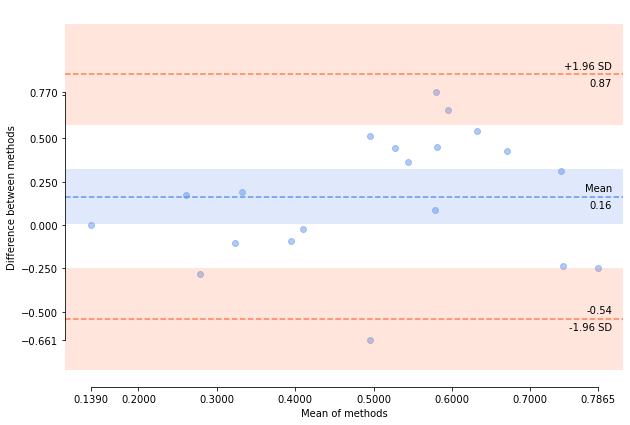

In [26]:
PC.blandAltman(metode_1, metode_2)

Menggunakan *limit of aggrement*

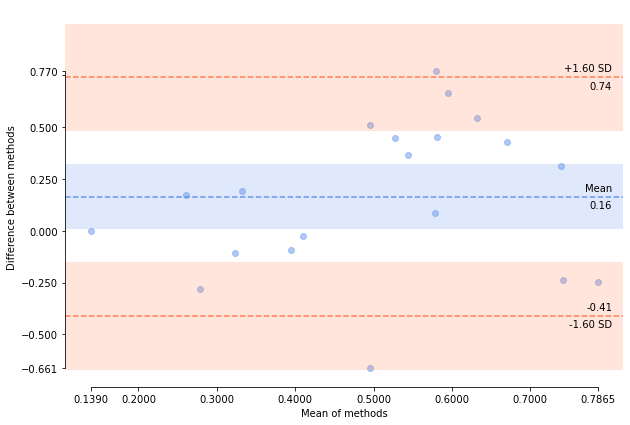

In [28]:
PC.blandAltman(metode_1, metode_2, limitOfAgreement=1.6)

Menggunakan *confidence intervals*

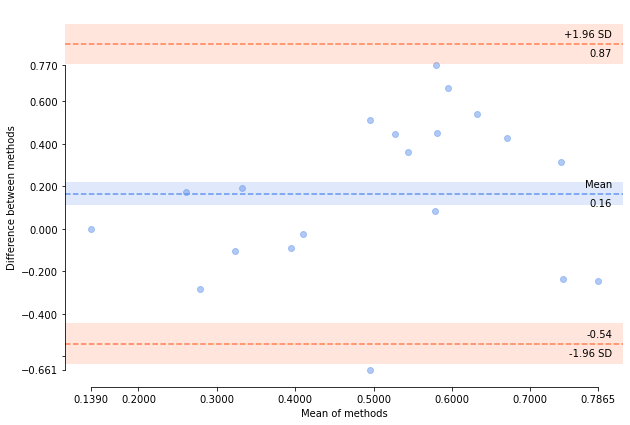

In [31]:
PC.blandAltman(metode_1, metode_2, confidenceInterval=50)

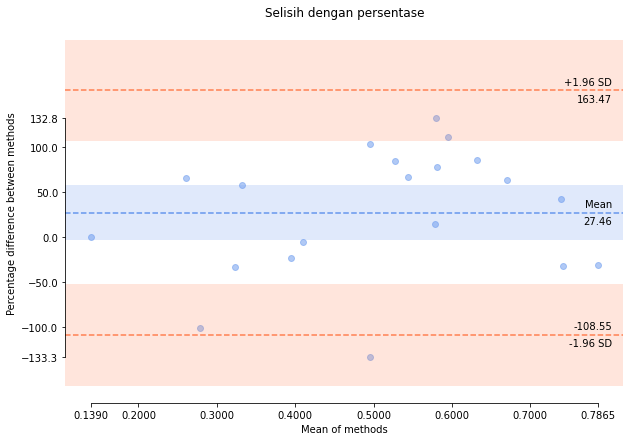

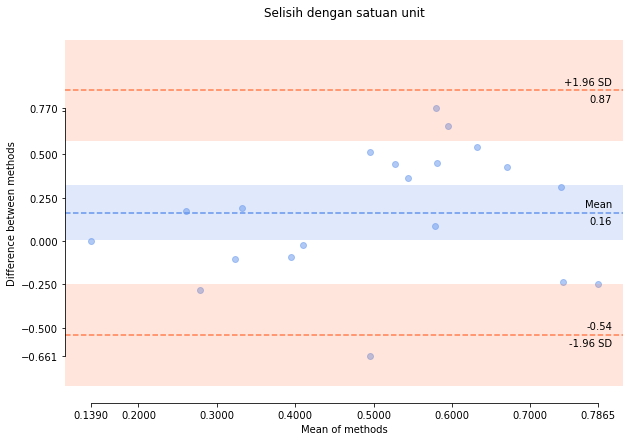

In [33]:
PC.blandAltman(metode_1, metode_2, percentage=True, title='Selisih dengan persentase',)
PC.blandAltman(metode_1, metode_2, percentage=False, title='Selisih dengan satuan unit')

Plot menggunakan kode

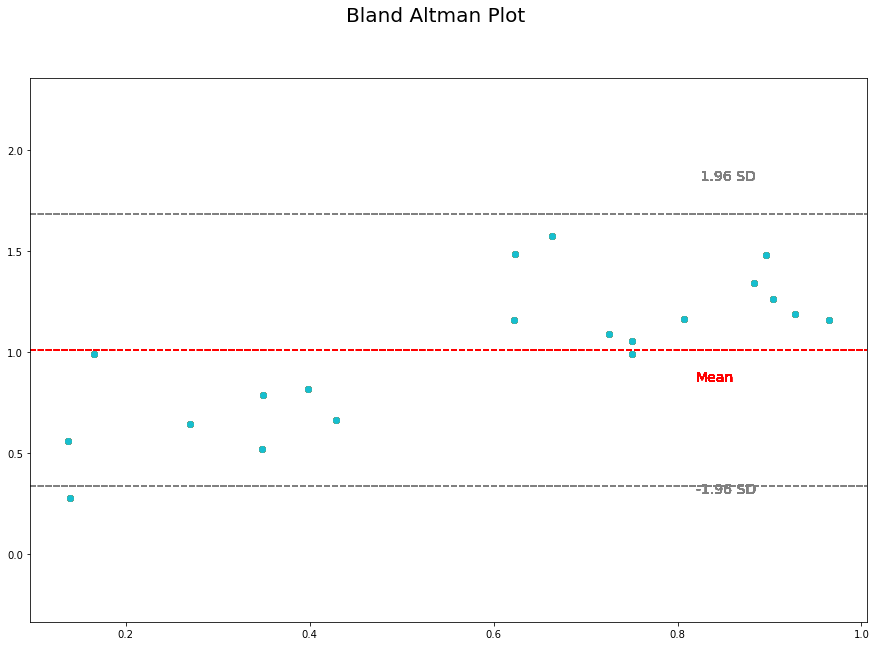

In [36]:
def bland_altman_plot(data_1,data_2,title='Bland Altman Plot',sd_limit=1.96, figsize=(15,10)):
    plt.figure(figsize=figsize)
    plt.suptitle(title, fontsize="20")
    if len(data_1) != len(data_2):
        raise ValueError('data_1 does not have the same length as data_2')
    else:
        for i in range(len(data_1)):
            a = np.asarray(data_1)

            b = np.asarray(data_1)+np.asarray(data_2)
            mean_diff = np.mean(b)
            std_diff = np.std(b, axis=0)
            limit_of_agreement = sd_limit * std_diff
            lower = mean_diff - limit_of_agreement
            upper = mean_diff + limit_of_agreement
                
            difference = upper - lower
            lowerplot = lower - (difference * 0.5)
            upperplot = upper + (difference * 0.5)
            plt.axhline(y=mean_diff, linestyle = "--", color = "red", label="mean diff")
            
            plt.axhline(y=lower, linestyle = "--", color = "grey", label="-1.96 SD")
            plt.axhline(y=upper, linestyle = "--", color = "grey", label="1.96 SD")
            
            plt.text(a.max()*0.85, upper * 1.1, " 1.96 SD", color = "grey", fontsize = "14")
            plt.text(a.max()*0.85, lower * 0.9, "-1.96 SD", color = "grey", fontsize = "14")
            plt.text(a.max()*0.85, mean_diff * 0.85, "Mean", color = "red", fontsize = "14")
            plt.ylim(lowerplot, upperplot)
            plt.scatter(x=a,y=b)
        plt.show()
bland_altman_plot(metode_1, metode_2)

4. Nilai yang terletak diantara $Mean+1.96\ STD$ sampai dengan $Mean-1.96\ STD$ menunjukkan adanya kesamaan dari kedua pengukuran, dengan nilai rata-rata sebagai nilai *limit of aggrement*. Sedangkan nilai yang berada di luar rentang tersebut dianggap sebagai outlier. Plot ini tidak menunjukkan apakah nilai kedua metode tersebut dapat diterima, hanya memberikan informasi berupa perbedaan antar metode. Bland Altman menunjukkan 4 jenis error antara lain:
    - Systematic error (mean offset): Atau bias, merupakan sejauh apa sebuah nilai itu berbeda dengan rata-ratanya.
    - Proportional error (trend): Dapat terlihat dari proporsinya terhadap nilai *limit of aggrement*
    - Inconsistent Variability: Nilai yang tidak konsisten bisa terlihat pada scatter plot. Ini bisa membantu saat melakukan eksperimen yang berulang untuk melihat perubahan nilai yang tidak biasa. Termasuk pada erratic Variability. keduanya juga bisa diukur dengan menggunakan *coefficient of repeatability*
    - Excessive/Erratic Variability: menunjukkan varibilitas yang tidak menentu antar metode

*coefficient of repeatability*

$k = 1.96 \times \sqrt{\frac{\sum (data_1 - data_2)^2}{n-1}}$

Referensi:

1. Bland-Altman Plot. ScienceDirect. Diakses 20 April 2021. [Link](https://www.sciencedirect.com/topics/medicine-and-dentistry/bland-altman-plot)
2. Giavarina D. Understanding Bland Altman analysis. Biochem Med (Zagreb). 2015;25(2):141-151. Published 2015 Jun 5. doi:10.11613/BM.2015.015. [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4470095/)
3. Bland-Altman Plot. Wikipedia. Diakses 20 April 2021. [Link](https://en.wikipedia.org/wiki/Bland–Altman_plot)
4.  Nurettin ÖzgürDoğan. Bland-Altman analysis: A paradigm to understand correlation and agreement. ScienceDirect. [Link](https://www.sciencedirect.com/science/article/pii/S2452247318302462)